In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
!ls

 data			 sample_data
 face-mask-dataset.zip	'WhatsApp Image 2025-07-07 at 21.03.58_e376a79b.jpg'
 kaggle.json


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')

In [ ]:
print(len(with_mask))
print(len(without_mask))

3725
3828


In [ ]:
print(with_mask[0:5])
print(with_mask[-5])

['with_mask_2782.jpg', 'with_mask_559.jpg', 'with_mask_872.jpg', 'with_mask_2663.jpg', 'with_mask_777.jpg']
with_mask_2943.jpg


In [ ]:
print(without_mask[0:5])
print(without_mask[-5])

['without_mask_1953.jpg', 'without_mask_3709.jpg', 'without_mask_363.jpg', 'without_mask_745.jpg', 'without_mask_715.jpg']
without_mask_742.jpg


**with mask --> 1
without mask -> 0**

In [ ]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


displaying **images**

In [ ]:
img = mping.imread('/content/data/with_mask/with_mask_1322.jpg')
img.shape

(428, 320, 3)

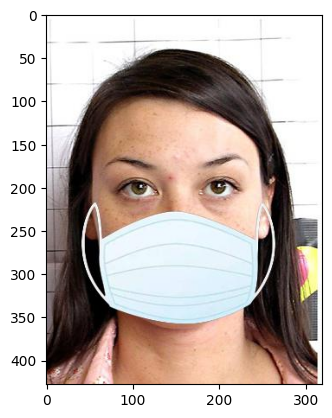

In [ ]:
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img2 = mping.imread('/content/data/without_mask/without_mask_3401.jpg')
img.shape

(428, 320, 3)

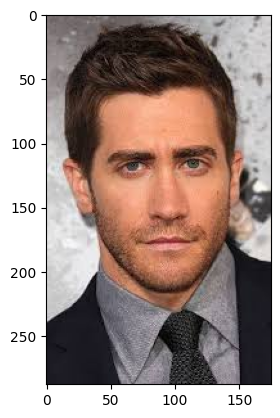

In [ ]:
imgplot = plt.imshow(img2)
plt.show()

**image procesing
1. resize images
2. convert the images to numpy arrays**

In [ ]:
with_mask_path ='/content/data/with_mask/'

data= []
for img_file in with_mask:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image= image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path ='/content/data/without_mask/'

for img_file in without_mask:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image= image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)
type(data)

list

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[164, 144, 146],
        [163, 143, 145],
        [161, 141, 143],
        ...,
        [ 52,  28,  26],
        [ 49,  25,  23],
        [ 47,  23,  21]],

       [[164, 144, 146],
        [162, 142, 144],
        [161, 141, 143],
        ...,
        [ 54,  30,  26],
        [ 52,  28,  24],
        [ 52,  28,  24]],

       [[163, 143, 145],
        [161, 141, 143],
        [160, 140, 142],
        ...,
        [ 56,  32,  28],
        [ 55,  30,  26],
        [ 56,  31,  27]]], dtype=uint8)
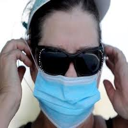

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


train test split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
print(X_train)
print(X_test)

[[[[184 180 171]
   [184 180 171]
   [184 180 171]
   ...
   [226 227 229]
   [229 230 233]
   [231 232 237]]

  [[184 180 171]
   [184 180 171]
   [184 180 171]
   ...
   [228 229 231]
   [226 227 230]
   [231 232 237]]

  [[186 182 173]
   [186 182 173]
   [186 182 173]
   ...
   [224 225 227]
   [230 231 234]
   [231 232 237]]

  ...

  [[213 199 218]
   [212 199 217]
   [210 198 217]
   ...
   [133 116 122]
   [133 116 124]
   [134 120 130]]

  [[208 199 223]
   [208 199 223]
   [206 197 223]
   ...
   [129 112 121]
   [132 115 124]
   [134 118 129]]

  [[200 196 226]
   [200 195 225]
   [200 195 225]
   ...
   [129 113 125]
   [133 117 128]
   [136 118 130]]]


 [[[ 94 168 159]
   [ 96 170 161]
   [ 97 174 164]
   ...
   [ 93 181 172]
   [ 94 181 173]
   [ 94 180 173]]

  [[ 22 101  92]
   [ 22 104  94]
   [ 24 108  96]
   ...
   [ 29 123 113]
   [ 28 122 111]
   [ 27 118 109]]

  [[ 24 114 103]
   [ 25 117 105]
   [ 26 121 107]
   ...
   [ 28 133 119]
   [ 30 133 120]
   [ 31 133

In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(7553,) (6042,) (1511,)


scaling data

In [ ]:
X_test = X_test/ 255
X_train = X_train/ 255


In [ ]:
print(X_train)

[[[[0.72156863 0.70588235 0.67058824]
   [0.72156863 0.70588235 0.67058824]
   [0.72156863 0.70588235 0.67058824]
   ...
   [0.88627451 0.89019608 0.89803922]
   [0.89803922 0.90196078 0.91372549]
   [0.90588235 0.90980392 0.92941176]]

  [[0.72156863 0.70588235 0.67058824]
   [0.72156863 0.70588235 0.67058824]
   [0.72156863 0.70588235 0.67058824]
   ...
   [0.89411765 0.89803922 0.90588235]
   [0.88627451 0.89019608 0.90196078]
   [0.90588235 0.90980392 0.92941176]]

  [[0.72941176 0.71372549 0.67843137]
   [0.72941176 0.71372549 0.67843137]
   [0.72941176 0.71372549 0.67843137]
   ...
   [0.87843137 0.88235294 0.89019608]
   [0.90196078 0.90588235 0.91764706]
   [0.90588235 0.90980392 0.92941176]]

  ...

  [[0.83529412 0.78039216 0.85490196]
   [0.83137255 0.78039216 0.85098039]
   [0.82352941 0.77647059 0.85098039]
   ...
   [0.52156863 0.45490196 0.47843137]
   [0.52156863 0.45490196 0.48627451]
   [0.5254902  0.47058824 0.50980392]]

  [[0.81568627 0.78039216 0.8745098 ]
   [0.8

**Making CNN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
no_of_class=2

model = keras.Sequential()

keras.Input(shape=(64, 64, 3)),
model.add(Conv2D(32,kernel_size=(3,3),kernel_regularizer=l2(0.001),activation='relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=l2(0.001),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),kernel_regularizer=l2(0.001),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(no_of_class,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training neural network

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 8: Train Model
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    validation_data=(X_test, Y_test),
    epochs=25,
    callbacks=[early_stop]
)

Epoch 1/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 27s 145ms/step - accuracy: 0.9377 - loss: 0.2651 - val_accuracy: 0.9510 - val_loss: 0.2095
Epoch 2/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 27s 142ms/step - accuracy: 0.9268 - loss: 0.2682 - val_accuracy: 0.9610 - val_loss: 0.1820
Epoch 3/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 26s 138ms/step - accuracy: 0.9436 - loss: 0.2337 - val_accuracy: 0.9610 - val_loss: 0.1703
Epoch 4/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - accuracy: 0.9479 - loss: 0.2253 - val_accuracy: 0.9596 - val_loss: 0.1763
Epoch 5/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 27s 141ms/step - accuracy: 0.9504 - loss: 0.2163 - val_accuracy: 0.9643 - val_loss: 0.1675
Epoch 6/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 27s 145ms/step - accuracy: 0.9508 - loss: 0.2019 - val_accuracy: 0.9530 - val_loss: 0.1794
Epoch 7/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 26s 140ms/step - accuracy: 0.9422 - loss: 0.2265 - val_accuracy: 0.9649 - val_loss: 0.1582
Epoch 8/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 27s 142ms/step - accuracy: 0.9438 - loss: 0

model evaluation

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9622 - loss: 0.1591
Test Accuracy = 0.9649239182472229


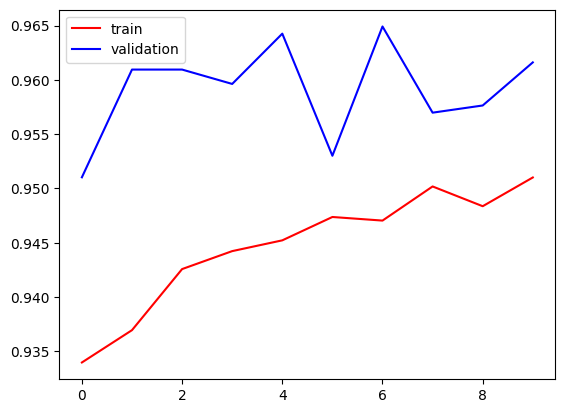

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

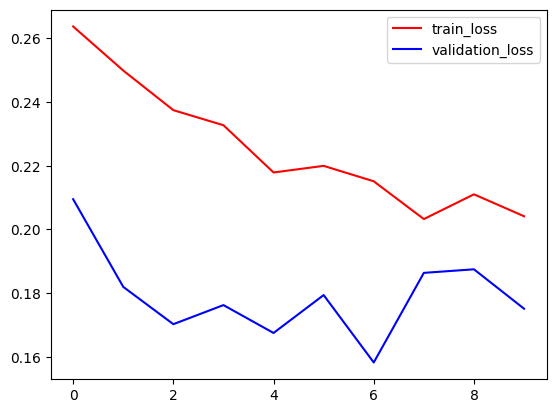

In [ ]:
plt.plot(history.history['loss'],color='red',label='train_loss')
plt.plot(history.history['val_loss'],color='blue',label='validation_loss')
plt.legend()
plt.show()

predictive system

In [ ]:
image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('the person is wearing mask')
else:
  print('the person is not wearing mask')

Output hidden; open in https://colab.research.google.com to view.